# Exponential Moving Average demonstration

The purpose of this notebook is to show how EMA softens a time series.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
#artificial intelligence trend from google trends:
#Source: https://trends.google.com/trends/explore?date=all&q=artificial%20intelligence
csvf ="ai.csv"

#Skip first 2 rows that contain a text description and an empty line
ait = pd.read_csv(csvf,skiprows=2)


In [33]:
#Visualize the content
ait.head(10)

,Mes,artificial intelligence: (Todo el mundo)
0,2004-01,93
1,2004-02,100
2,2004-03,83
3,2004-04,92
4,2004-05,58
5,2004-06,66
6,2004-07,61
7,2004-08,68
8,2004-09,83
9,2004-10,65


In [34]:
#Verify that the index is sorted
ait = ait.sort_values('Mes')
ait.head(10)

,Mes,artificial intelligence: (Todo el mundo)
0,2004-01,93
1,2004-02,100
2,2004-03,83
3,2004-04,92
4,2004-05,58
5,2004-06,66
6,2004-07,61
7,2004-08,68
8,2004-09,83
9,2004-10,65


In [37]:
aitv = ait.iloc[:,1].values
aitv

array([ 93, 100,  83,  92,  58,  66,  61,  68,  83,  65,  71,  72,  57,
        66,  65,  58,  56,  51,  52,  42,  59,  48,  59,  38,  40,  42,
        41,  38,  32,  31,  30,  30,  44,  37,  37,  34,  28,  29,  33,
        32,  32,  23,  28,  25,  28,  30,  30,  27,  27,  28,  30,  26,
        24,  23,  21,  20,  25,  24,  25,  23,  22,  25,  25,  26,  25,
        22,  24,  29,  27,  26,  28,  26,  27,  26,  26,  25,  22,  20,
        21,  21,  24,  29,  25,  22,  23,  25,  23,  23,  22,  21,  21,
        24,  25,  31,  31,  27,  25,  26,  26,  22,  23,  22,  21,  20,
        24,  24,  21,  21,  21,  23,  21,  23,  22,  20,  18,  18,  21,
        22,  24,  21,  23,  25,  24,  24,  23,  20,  18,  23,  22,  24,
        28,  27,  27,  29,  29,  27,  32,  27,  30,  28,  29,  31,  32,
        29,  34,  31,  36,  35,  32,  31,  26,  27,  32,  38,  41,  40,
        42,  43,  46,  44,  49,  43,  45,  53,  58,  63,  68,  65])

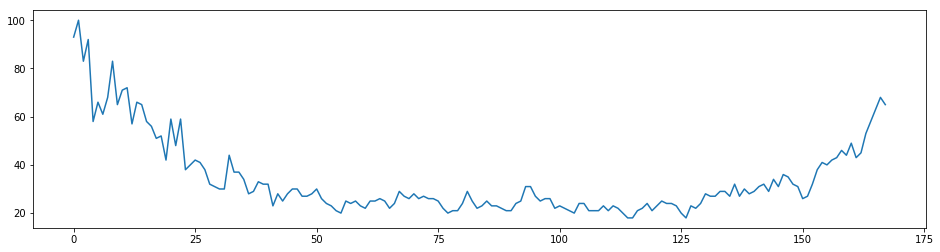

In [44]:
#Create an array from 0 to the number of elements of the trend 
t = np.arange(0,aitv.shape[0])
#modify the width and height of the plot
fig=plt.figure(figsize=(16,4))

plt.plot(t,aitv)
plt.show()

# Exponential Moving average (EMA)

Ema formula:  
t=0 -> S=Y  
t>0 -> S = alpha*St + (1-alpha)*St-1  

In [74]:
#Define EMA
def EMA(v_prev,v_now,alpha):
    return alpha*v_now+(1-alpha)*v_prev

#Create values for alpha
_alpha = np.linspace(0.1,0.9,10)
print("Alpha values:\n",_alpha)

#Get the EMA for different alphas and save the values in a dictionary
ema_dic = {}
for _a in _alpha:
    ema_dic[_a]=[aitv[0]]
    for _ in range(0,aitv.shape[0]-1):
        _ema = EMA(ema_dic[_a][_],aitv[_+1],_a)
        ema_dic[_a].append(_ema)

Alpha values:
 [ 0.1         0.18888889  0.27777778  0.36666667  0.45555556  0.54444444
  0.63333333  0.72222222  0.81111111  0.9       ]


In [62]:
print("See if the generated values have the same number of elements",len(ema_dic[0.1]),aitv.shape)


See if the generated values have the same number of elements 168 (168,)


#  Visualize EMA

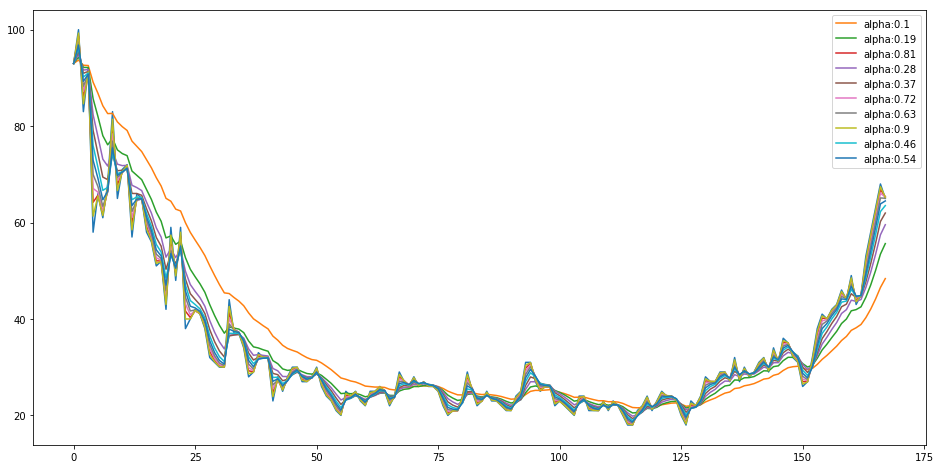

In [75]:
t = np.arange(0,aitv.shape[0])
fig=plt.figure(figsize=(16,8))

#Plot the base line points
plt.plot(t,aitv)

for key in ema_dic.keys():
    plt.plot(t,ema_dic[key],label="alpha:"+str(np.round(key,2)))
plt.legend()
plt.show()

## Separate plots for a better visualization

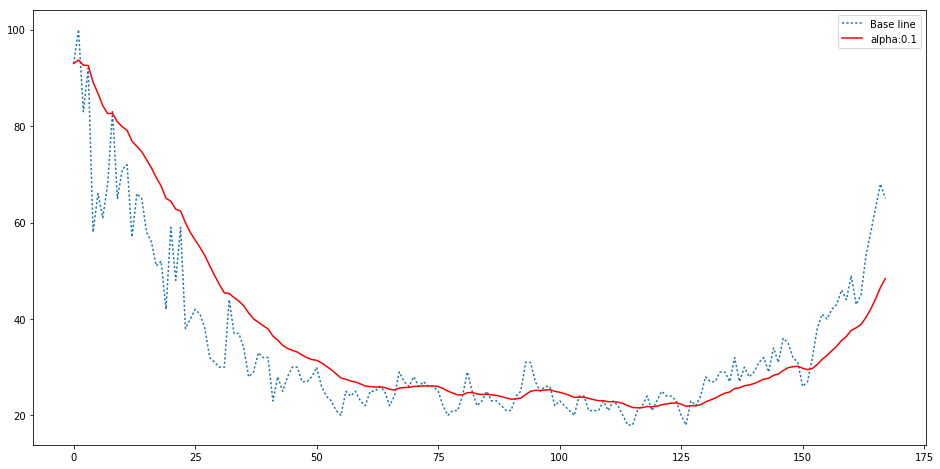

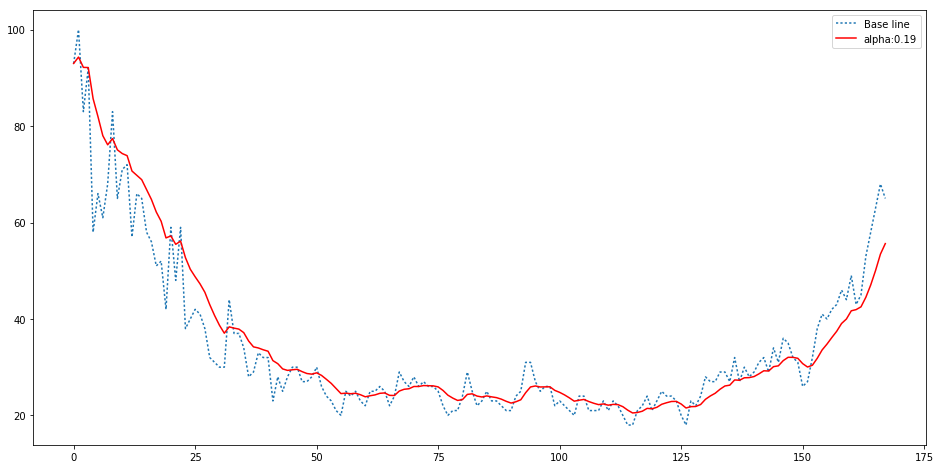

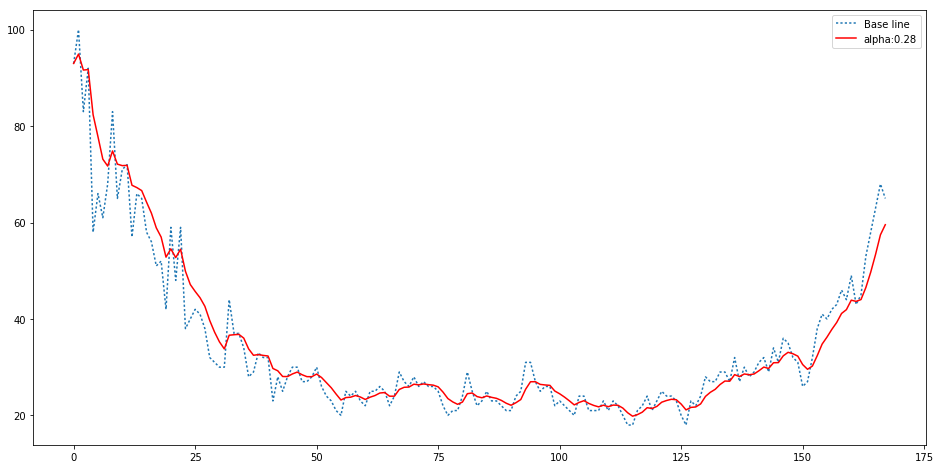

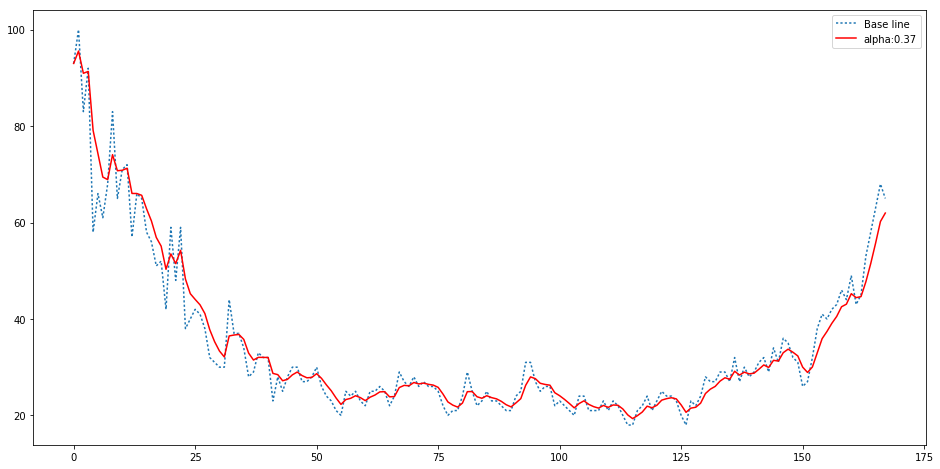

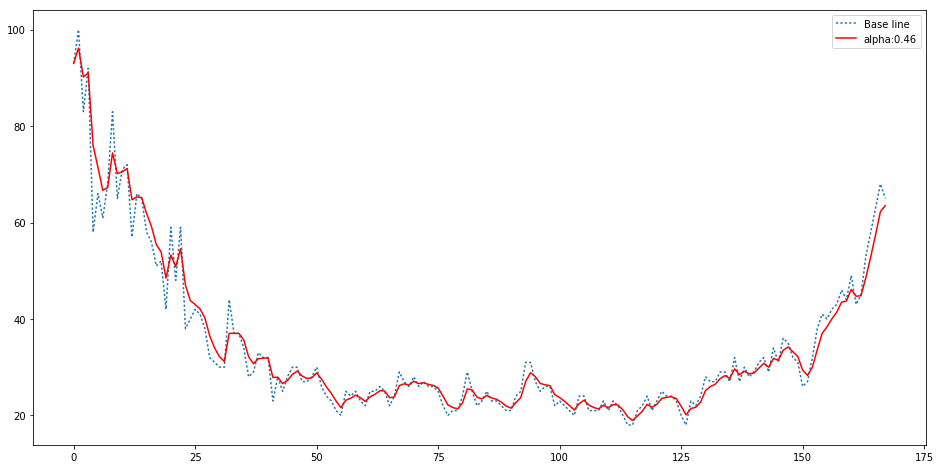

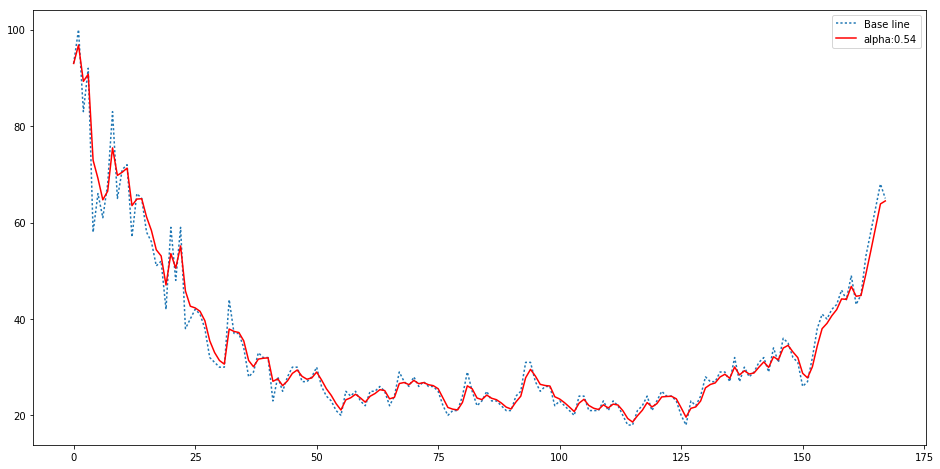

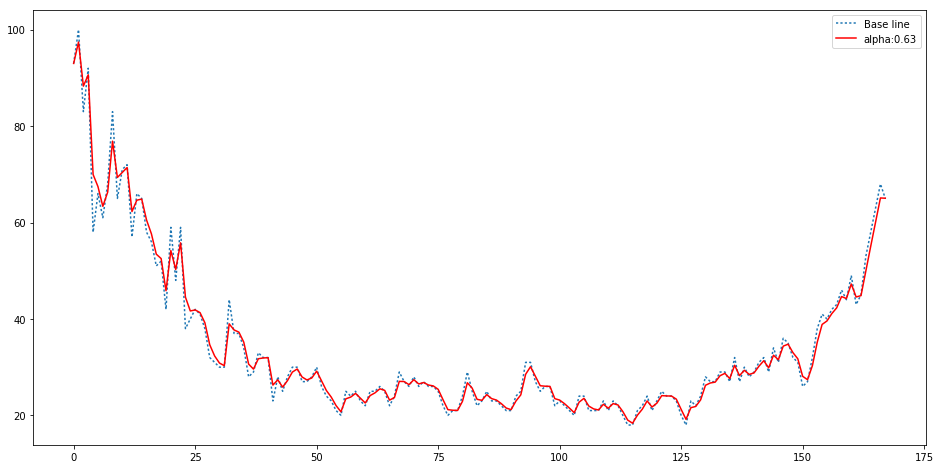

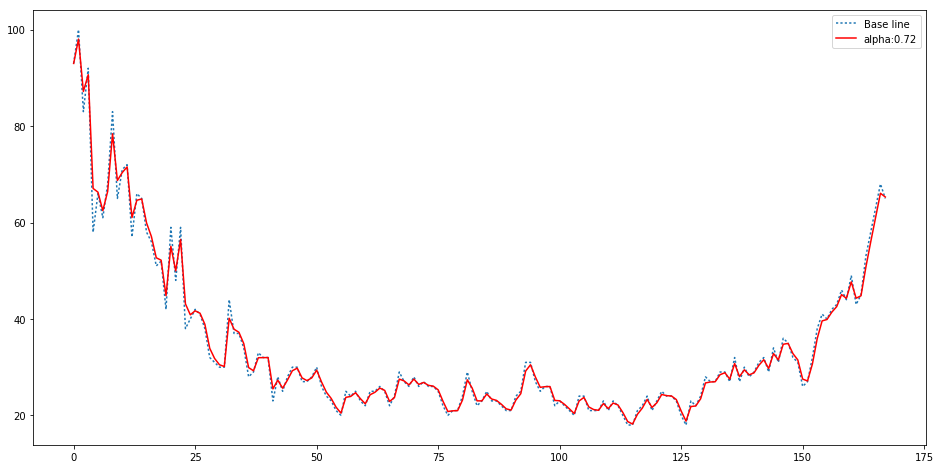

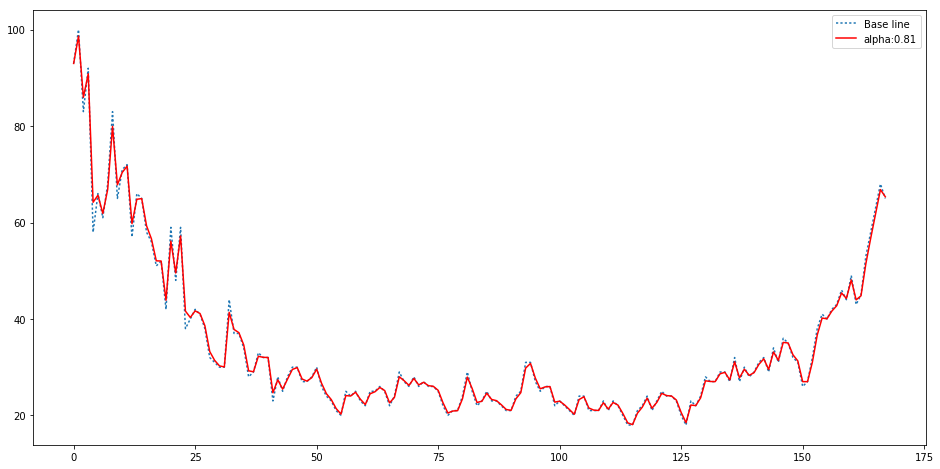

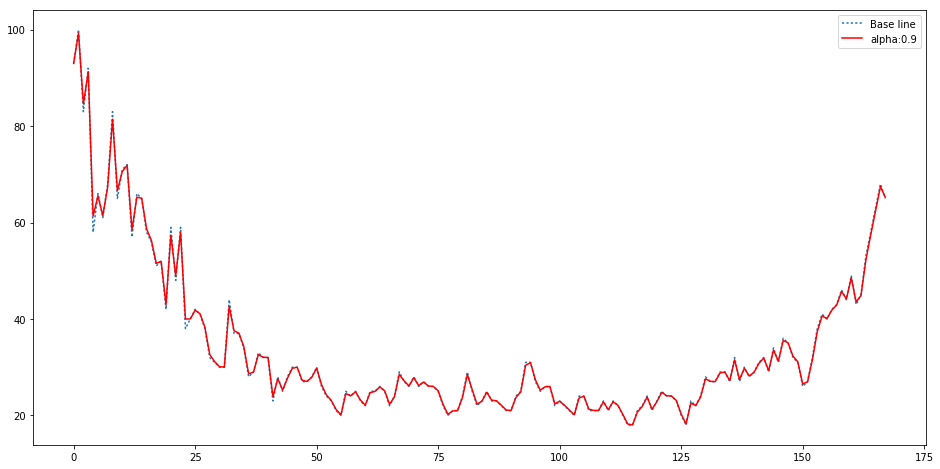

In [76]:
t = np.arange(0,aitv.shape[0])

for key in sorted(ema_dic.keys()):
    fig=plt.figure(figsize=(16,8))
    plt.plot(t,aitv,label="Base line",linestyle=':')
    plt.plot(t,ema_dic[key],label="alpha:"+str(np.round(key,2)),c="red")
    plt.legend()
    plt.show()

EMA will soften more the closer it gets to zero.